In [1]:
from espei.parameter_selection.fitting_descriptions import ModelFittingDescription, elastic_fitting_description, ElasticModel, molar_volume_fit_desc
from espei.paramselect import fit_parameters

# all aux stuff
from espei.logger import config_logger
from espei.utils import PickleableTinyDB, MemoryStorage
from pycalphad import Database, Model, variables as v
import numpy as np
import matplotlib.pyplot as plt
from symengine import lambdify
config_logger(0)

In [7]:
# Elastic fitting
from pycalphad import Database, Model

db_elastic = Database("""
 ELEMENT VA   VACUUM 0.0000E+00  0.0000E+00  0.0000E+00!
 ELEMENT TI   BCC_A2 0.0000E+00  0.0000E+00  0.0000E+00 !
 ELEMENT MO   BCT_A5 0.0000E+00  0.0000E+00  0.0000E+00 !
 ELEMENT NB   BCC_A2 0.0000E+00  0.0000E+00  0.0000E+00 !
 ELEMENT SN   BCT_A5 0.0000E+00  0.0000E+00  0.0000E+00 !
 ELEMENT TA   BCC_A2 0.0000E+00  0.0000E+00  0.0000E+00 !
 ELEMENT ZR   BCT_A5 0.0000E+00  0.0000E+00  0.0000E+00 !

 TYPE_DEFINITION % SEQ *!
 DEFINE_SYSTEM_DEFAULT ELEMENT 6 !
 DEFAULT_COMMAND DEF_SYS_ELEMENT VA !

 TYPE_DEFINITION & GES A_P_D BCC_A2 MAGNETIC  -1.0    4.00000E-01 !
 PHASE BCC_A2  %&  2 1   3 !
    CONSTITUENT BCC_A2  :TI,MO,NB,SN,TA,ZR : VA :  !
""")

# Data digitized from Marker et al., Com. Mat. Sci. 142 (2018) 215-226.
datasets_elastic = [
    {
        "components": ["TI"],
        "phases": ["BCC_A2"],
        "output": "C11",
        "values": [[[93]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["TI"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["TI"],
        "phases": ["BCC_A2"],
        "output": "C12",
        "values": [[[115]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["TI"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["TI"],
        "phases": ["BCC_A2"],
        "output": "C44",
        "values": [[[41]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["TI"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO"],
        "phases": ["BCC_A2"],
        "output": "C11",
        "values": [[[475]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO"],
        "phases": ["BCC_A2"],
        "output": "C12",
        "values": [[[164]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO"],
        "phases": ["BCC_A2"],
        "output": "C44",
        "values": [[[108]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN"],
        "phases": ["BCC_A2"],
        "output": "C11",
        "values": [[[50]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN"],
        "phases": ["BCC_A2"],
        "output": "C12",
        "values": [[[52]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN"],
        "phases": ["BCC_A2"],
        "output": "C44",
        "values": [[[29]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN"], ["VA"]]], "sublattice_occupancies": [[[1.0], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO", "TI"],
        "phases": ["BCC_A2"],
        "output": "C11",
        "values": [[[124, 146, 178, 268, 385, 451, 464]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.13, 0.87], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]], [[0.94, 0.06], [1.0]], [[0.98, 0.02], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO", "TI"],
        "phases": ["BCC_A2"],
        "output": "C12",
        "values": [[[111, 113, 123, 136, 146, 158, 163]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.13, 0.87], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]], [[0.94, 0.06], [1.0]], [[0.98, 0.02], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["MO", "TI"],
        "phases": ["BCC_A2"],
        "output": "C44",
        "values": [[[38, 29, 32, 42, 66, 96, 100]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]], [["MO", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.13, 0.87], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]], [[0.94, 0.06], [1.0]], [[0.98, 0.02], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN", "TI"],
        "phases": ["BCC_A2"],
        "output": "C11",
        "values": [[[100, 105, 88, 92]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN", "TI"],
        "phases": ["BCC_A2"],
        "output": "C12",
        "values": [[[122, 114, 93, 55]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
    {
        "components": ["SN", "TI"],
        "phases": ["BCC_A2"],
        "output": "C44",
        "values": [[[46, 60, 46, 35]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1, 3], "sublattice_configurations": [[["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]], [["SN", "TI"], ["VA"]]], "sublattice_occupancies": [[[0.06, 0.94], [1.0]], [[0.25, 0.75], [1.0]], [[0.50, 0.50], [1.0]], [[0.75, 0.25], [1.0]]]},
        "reference": "Marker (2018)",
        "bibtex": "marker2018binary_elastic",
        "comment": "Values pulled from Table 4 (DFT calculations).",
        "tags": []
    },
]
datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets_elastic)
if not hasattr(db_elastic, 'varcounter'):
    db_elastic.varcounter = 0

fit_parameters(db_elastic, ["TI", "VA"], "BCC_A2", (("TI",),("VA",)), None, datasets_db, fitting_descrption=elastic_fitting_description)
fit_parameters(db_elastic, ["MO", "VA"], "BCC_A2", (("MO",),("VA",)), None, datasets_db, fitting_descrption=elastic_fitting_description)
fit_parameters(db_elastic, ["SN", "VA"], "BCC_A2", (("SN",),("VA",)), None, datasets_db, fitting_descrption=elastic_fitting_description)
fit_parameters(db_elastic, ["MO", "TI", "VA"], "BCC_A2", (("MO", "TI",),("VA",)), None, datasets_db, ridge_alpha=1.0e-5, fitting_descrption=elastic_fitting_description)
fit_parameters(db_elastic, ["SN", "TI", "VA"], "BCC_A2", (("SN", "TI",),("VA",)), None, datasets_db, ridge_alpha=1.0e-5, fitting_descrption=elastic_fitting_description)


(0.0, 70.0)

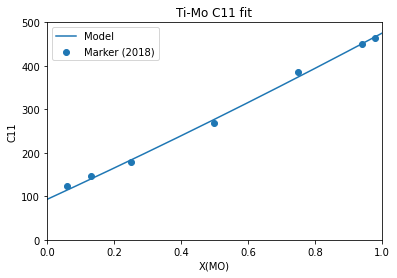

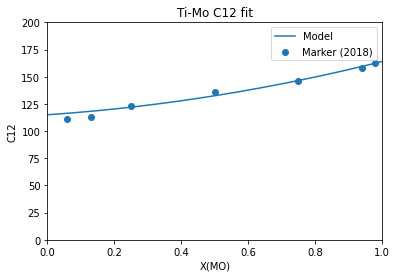

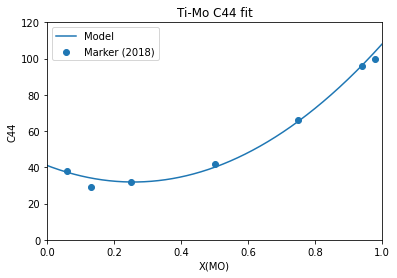

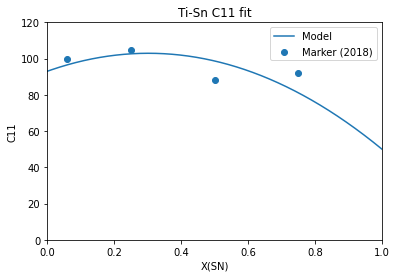

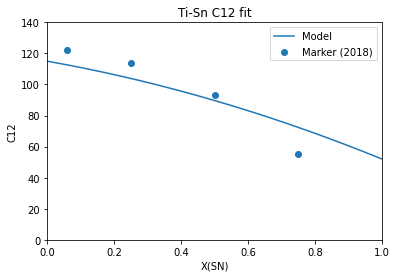

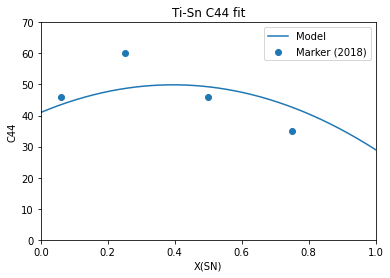

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from symengine import lambdify
from pycalphad import variables as v
# Ti-Mo
#######
mod_el = ElasticModel(db_elastic, ["TI", "MO", "VA"], "BCC_A2")

x_TI = np.linspace(0, 1, 1001)
x_MO = 1 - x_TI
x_MO_TI_VA = np.empty((x_TI.shape[-1], 3))
x_MO_TI_VA[:, 0] = x_MO
x_MO_TI_VA[:, 1] = x_TI
x_MO_TI_VA[:, 2] = np.ones_like(x_TI)
func_MO_TI_C11 = lambdify([v.Y("BCC_A2", 0, "MO"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C11])
func_MO_TI_C12 = lambdify([v.Y("BCC_A2", 0, "MO"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C12])
func_MO_TI_C44 = lambdify([v.Y("BCC_A2", 0, "MO"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C44])
# get data
x_MO_data = [occu[0][0] for occu in datasets_elastic[9]["solver"]["sublattice_occupancies"]]
C11_data = np.asarray(datasets_elastic[9]["values"]).squeeze()
C12_data = np.asarray(datasets_elastic[10]["values"]).squeeze()
C44_data = np.asarray(datasets_elastic[11]["values"]).squeeze()

# Plot
plt.title("Ti-Mo C11 fit")
plt.plot(x_MO, func_MO_TI_C11(x_MO_TI_VA), label="Model")
plt.scatter(x_MO_data, C11_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(MO)")
plt.ylabel("C11")
plt.xlim(0, 1)
plt.ylim(0, 500)

plt.figure()
plt.title("Ti-Mo C12 fit")
plt.plot(x_MO, func_MO_TI_C12(x_MO_TI_VA), label="Model")
plt.scatter(x_MO_data, C12_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(MO)")
plt.ylabel("C12")
plt.xlim(0, 1)
plt.ylim(0, 200)

plt.figure()
plt.title("Ti-Mo C44 fit")
plt.plot(x_MO, func_MO_TI_C44(x_MO_TI_VA), label="Model")
plt.scatter(x_MO_data, C44_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(MO)")
plt.ylabel("C44")
plt.xlim(0, 1)
plt.ylim(0, 120)


# Ti-Sn
#######
mod_el = ElasticModel(db_elastic, ["TI", "SN", "VA"], "BCC_A2")

x_TI = np.linspace(0, 1, 1001)
x_SN = 1 - x_TI
x_SN_TI_VA = np.empty((x_TI.shape[-1], 3))
x_SN_TI_VA[:, 0] = x_SN
x_SN_TI_VA[:, 1] = x_TI
x_SN_TI_VA[:, 2] = np.ones_like(x_TI)
func_SN_TI_C11 = lambdify([v.Y("BCC_A2", 0, "SN"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C11])
func_SN_TI_C12 = lambdify([v.Y("BCC_A2", 0, "SN"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C12])
func_SN_TI_C44 = lambdify([v.Y("BCC_A2", 0, "SN"), v.Y("BCC_A2", 0, "TI"), v.Y("BCC_A2", 1, "VA")], [mod_el.C44])
# get data
x_SN_data = [occu[0][0] for occu in datasets_elastic[12]["solver"]["sublattice_occupancies"]]
C11_data = np.asarray(datasets_elastic[12]["values"]).squeeze()
C12_data = np.asarray(datasets_elastic[13]["values"]).squeeze()
C44_data = np.asarray(datasets_elastic[14]["values"]).squeeze()

# Plot
plt.figure()
plt.title("Ti-Sn C11 fit")
plt.plot(x_SN, func_SN_TI_C11(x_SN_TI_VA), label="Model")
plt.scatter(x_SN_data, C11_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(SN)")
plt.ylabel("C11")
plt.xlim(0, 1)
plt.ylim(0, 120)

plt.figure()
plt.title("Ti-Sn C12 fit")
plt.plot(x_SN, func_SN_TI_C12(x_SN_TI_VA), label="Model")
plt.scatter(x_SN_data, C12_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(SN)")
plt.ylabel("C12")
plt.xlim(0, 1)
plt.ylim(0, 140)

plt.figure()
plt.title("Ti-Sn C44 fit")
plt.plot(x_SN, func_SN_TI_C44(x_SN_TI_VA), label="Model")
plt.scatter(x_SN_data, C44_data, label='Marker (2018)')
plt.legend()
plt.xlabel("X(SN)")
plt.ylabel("C44")
plt.xlim(0, 1)
plt.ylim(0, 70)


[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]
data_1pt_VM 9.997209252001686e-06


(0.0, 1.0)

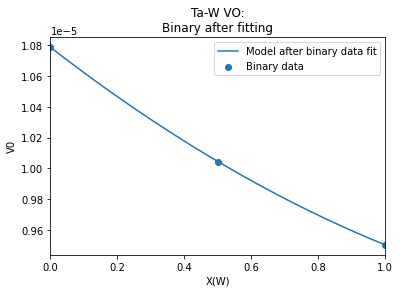

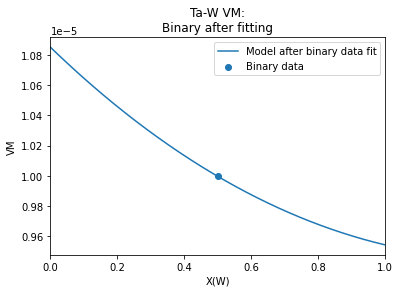

In [2]:
config_logger(0)
datasets = [
    # dummy dataset for 50/50 composition, eventually these should be real ESPEI datasets
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "output": "V0",
        "values": [[[1.00448925e-05]]],  # "fixed" value (absolute value from mix data with calphd reference state) extracted manually from above
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]]], "sublattice_occupancies": [[[0.5, 0.5]]]},
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    },
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "output": "VM_MIX",
        "values": [[[-2e-7]]],
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]]], "sublattice_occupancies": [[[0.5, 0.5]]]},
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    },
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)


# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "W"], "BCC_A2")

x_TA = np.linspace(0, 1, 1001)
x_W = 1-x_TA
x_TA_W = np.empty((x_TA.shape[-1], 2))
x_TA_W[:, 0] = x_TA
x_TA_W[:, 1] = x_W
func_V0_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])
func_VM_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.VM.subs({v.T: 298.15}), mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

data_1pt_x_W = data_5pt_x_W[[0,2,4]]
data_1pt_V0 = data_5pt_V0_fix[[0,2,4]]

plt.title("Ta-W VO:\nBinary after fitting")
plt.plot(x_W, func_V0_TA_W(x_TA_W), label="Model after binary data fit")
plt.scatter(data_1pt_x_W, data_1pt_V0, label='Binary data')
plt.legend()
plt.xlabel("X(W)")
plt.ylabel("V0")
plt.xlim(0, 1)

plt.figure()

plt.title("Ta-W VM:\nBinary after fitting")
plt.plot(x_W, func_VM_TA_W(x_TA_W), label="Model after binary data fit")
data_1pt_VM = -2.0e-7 + (func_VM_TA_W([1, 0])*0.5 + func_VM_TA_W([0, 1])*0.5)
data_3pt_VM = [
    +1.0e-7 + (func_VM_TA_W([1, 0])*0.75 + func_VM_TA_W([0, 1])*0.25),
    -2.0e-7 + (func_VM_TA_W([1, 0])*0.50 + func_VM_TA_W([0, 1])*0.50),
    -4.0e-7 + (func_VM_TA_W([1, 0])*0.25 + func_VM_TA_W([0, 1])*0.75),
]
print("data_1pt_VM", data_1pt_VM)
plt.scatter([0.5], data_1pt_VM, label='Binary data')
# print("data_3pt_VM", data_3pt_VM)
# plt.scatter([0.25, 0.5, 0.75], data_3pt_VM, label='Binary data')
plt.legend()
plt.xlabel("X(W)")
plt.ylabel("VM")
plt.xlim(0, 1)

[[5.000e-01 5.000e-01 2.000e+02]
 [5.000e-01 5.000e-01 2.008e+02]
 [5.000e-01 5.000e-01 2.016e+02]
 ...
 [5.000e-01 5.000e-01 9.984e+02]
 [5.000e-01 5.000e-01 9.992e+02]
 [5.000e-01 5.000e-01 1.000e+03]]
data_3pt_VM [1.0177209252001686e-05, 1.0212107794562173e-05, 1.0266642662016848e-05]


Text(0, 0.5, 'VM')

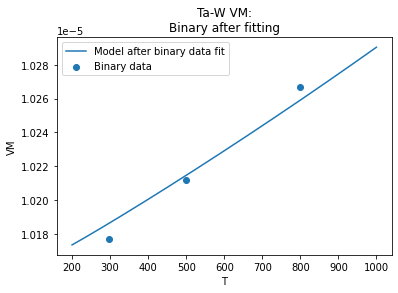

In [4]:
# VA binary fitting w/ temperature dependence

datasets = [
    # dummy dataset for 50/50 composition, eventually these should be real ESPEI datasets
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "output": "V0_MIX",
        "values": [[[-1e-9]]],  # "fixed" value (absolute value from mix data with calphd reference state) extracted manually from above
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]]], "sublattice_occupancies": [[[0.5, 0.5]]]},
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    },
    # 1 point VA with temp dependence using mixing reference state
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "output": "VM_MIX",
        "values": [[[-2e-8], [-2e-8], [-2e-8]]],
        "conditions": {"T": [298.15, 500, 800], "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]]], "sublattice_occupancies": [[[0.5, 0.5]]]},
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    },

]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)

# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "W"], "BCC_A2")

TT = np.linspace(200, 1000, 1001)
x_TA = np.full_like(TT, 0.5)
x_W = 1-x_TA
x_TA_W_T = np.empty((TT.shape[-1], 3))
x_TA_W_T[:, 0] = x_TA
x_TA_W_T[:, 1] = x_W
x_TA_W_T[:, 2] = TT
func_VM_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W"), v.T], [mod.symbol_replace(mod.VM, mod._symbols)])

print(x_TA_W_T)

plt.title("Ta-W VM:\nBinary after fitting")
plt.plot(TT, func_VM_TA_W(x_TA_W_T), label="Model after binary data fit")
data_3pt_VM_T = [
    -2.0e-8 + (func_VM_TA_W([1, 0, 298.15])*0.50 + func_VM_TA_W([0, 1, 298.15])*0.50),
    -2.0e-8 + (func_VM_TA_W([1, 0, 500])*0.50 + func_VM_TA_W([0, 1, 500])*0.50),
    -2.0e-8 + (func_VM_TA_W([1, 0, 800])*0.50 + func_VM_TA_W([0, 1, 800])*0.50),
]
# plt.scatter([0.5], data_1pt_VM, label='Binary data')
print("data_3pt_VM", data_3pt_VM_T)
plt.scatter([298.15, 500, 800], data_3pt_VM_T, label='Binary data')
plt.legend()
plt.xlabel("T")
plt.ylabel("VM")

## Unary fitting

Using Hf here so we can use the same TDB (there's no BCC data for Hf)

The data itself is fictious and based on Lu 2005 Al data.

In [3]:
datasets = [
    # Hf
    {
        "components": ["HF"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": 298.15},
        "output": "V0",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["HF"]]], "sublattice_occupancies": [[[1.0]]]},
        "values": [[[10.1092e-6]]],
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    },
    {
        "components": ["HF"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": [274.5886654478977, 317.001828153565, 376.9652650822671, 455.94149908592334, 531.9926873857406, 602.1937842778796, 691.4076782449727, 850.8226691042048, 945.8866544789764, 1081.9012797074956, 1232.5411334552105]},
        "output": "VM",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["HF"]]], "sublattice_occupancies": [[[1.0]]]},
        "values": [[[0.0000102595070150209], [0.000010282702483979838], [0.000010316942197393508], [0.00001036333044520191], [0.000010413028200193464], [0.000010467137734726063], [0.00001052456686435235], [0.000010640519998161758], [0.000010715609696499606], [0.000010824930365395328], [0.000010955226490404716]]],
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]

In [4]:
dbf = Database("lu2005-volumes.tdb")
mod_nofit = Model(dbf, ["HF"], "BCC_A2")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["HF"], "BCC_A2", (("HF",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)


Pre-fit plot

Text(0, 0.5, 'VM')

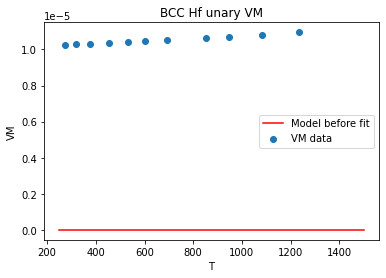

In [7]:

mod = Model(dbf, ["HF"], "BCC_A2")

pT = np.linspace(250, 1500, 1001)
func_HF_VM_nofit = lambdify([v.T], [mod_nofit.symbol_replace(mod_nofit.VM.subs({v.Y("BCC_A2", 0, "HF"): 1.0}), mod_nofit._symbols)])
func_HF_VM = lambdify([v.T], [mod.symbol_replace(mod.VM.subs({v.Y("BCC_A2", 0, "HF"): 1.0}), mod._symbols)])

# raw V0s from DFT
data_T = np.asarray(datasets[1]["conditions"]["T"])
data_VM = np.asarray(datasets[1]["values"]).squeeze()


plt.title("BCC Hf unary VM")
# plt.plot(pT, func_HF_VM(pT), label="Model after fit")
plt.plot(pT, func_HF_VM_nofit(pT), label="Model before fit", c='r')
plt.scatter(data_T, data_VM, label='VM data')
plt.legend()
plt.xlabel("T")
plt.ylabel("VM")
# plt.xlim(0, 1)

Text(0, 0.5, 'VM')

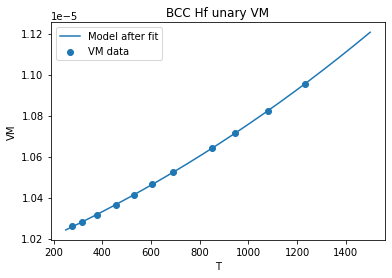

In [8]:
pT = np.linspace(250, 1500, 1001)
func_HF_VM_nofit = lambdify([v.T], [mod.symbol_replace(mod_nofit.VM.subs({v.Y("BCC_A2", 0, "HF"): 1.0}), mod_nofit._symbols)])
func_HF_VM = lambdify([v.T], [mod.symbol_replace(mod.VM.subs({v.Y("BCC_A2", 0, "HF"): 1.0}), mod._symbols)])

# raw V0s from DFT
data_T = np.asarray(datasets[1]["conditions"]["T"])
data_VM = np.asarray(datasets[1]["values"]).squeeze()


plt.title("BCC Hf unary VM")
plt.plot(pT, func_HF_VM(pT), label="Model after fit")
# plt.plot(pT, func_HF_VM_nofit(pT), label="Model before fit", c='r')
plt.scatter(data_T, data_VM, label='VM data')
plt.legend()
plt.xlabel("T")
plt.ylabel("VM")
# plt.xlim(0, 1)

## Binary fitting

### Basic 1 point data

In [9]:
datasets = [
    # dummy dataset for 50/50 composition, eventually these should be real ESPEI datasets
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "output": "V0",
        "values": [[[1.00448925e-05]]],  # "fixed" value (absolute value from mix data with calphd reference state) extracted manually from above
        "conditions": {"T": 298.15, "P": 101325},
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]]], "sublattice_occupancies": [[[0.5, 0.5]]]},
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W"),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)


[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]


(0.0, 1.0)

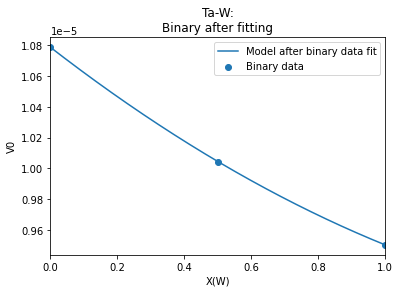

In [10]:
# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "W"], "BCC_A2")

x_TA = np.linspace(0, 1, 1001)
x_W = 1-x_TA
x_TA_W = np.empty((x_TA.shape[-1], 2))
x_TA_W[:, 0] = x_TA
x_TA_W[:, 1] = x_W
func_V0_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

data_1pt_x_W = data_5pt_x_W[[0,2,4]]
data_1pt_V0 = data_5pt_V0_fix[[0,2,4]]

plt.title("Ta-W:\nBinary after fitting")
plt.plot(x_W, func_V0_TA_W(x_TA_W), label="Model after binary data fit")
plt.scatter(data_1pt_x_W, data_1pt_V0, label='Binary data')
plt.legend()
plt.xlabel("X(W)")
plt.ylabel("V0")
plt.xlim(0, 1)

Repeat the above, but now use a real dataset

In [11]:
datasets = [
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": 298.15},
        "output": "V0",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]], [["TA", "W"]], [["TA", "W"]]], "sublattice_occupancies": [[[0.75, 0.25]], [[0.5, 0.5]], [[0.25, 0.75]]]},
        "values": [[[1.04002492e-05, 1.00448925e-05, 9.76045653e-06]]],  # fixed values from calculation w/ calphad refstate
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)


mix [ 0.00000000e+00 -6.58257874e-08 -1.00257453e-07 -6.37684692e-08
  0.00000000e+00]
[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]


(0.0, 1.0)

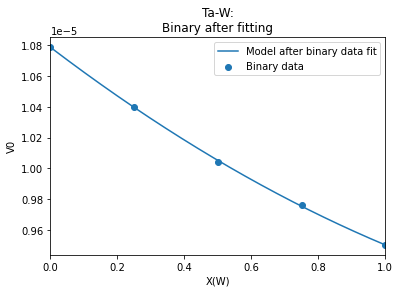

In [14]:
# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "W"], "BCC_A2")

x_TA = np.linspace(0, 1, 1001)
x_W = 1-x_TA
x_TA_W = np.empty((x_TA.shape[-1], 2))
x_TA_W[:, 0] = x_TA
x_TA_W[:, 1] = x_W
func_V0_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
print("mix", data_5pt_V0_mix)
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

plt.title("Ta-W:\nBinary after fitting")
plt.plot(x_W, func_V0_TA_W(x_TA_W), label="Model after binary data fit")
plt.scatter(data_5pt_x_W, data_5pt_V0_fix, label='Binary data')
plt.legend()
plt.xlabel("X(W)")
plt.ylabel("V0")
plt.xlim(0, 1)

## Mixing

In [16]:
datasets = [
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": 298.15},
        "output": "V0_MIX",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]], [["TA", "W"]], [["TA", "W"]]], "sublattice_occupancies": [[[0.75, 0.25]], [[0.5, 0.5]], [[0.25, 0.75]]]},
        "values": [[[-6.58257874e-08, -1.00257453e-07, -6.37684692e-08]]],
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)
print(dbf.symbols)

{'VV0000': Piecewise((0.0, And(1.0 <= T, T < 10000.0)), (0, True)), 'VV0001': -3.71677e-07}


mix [ 0.00000000e+00 -6.58257874e-08 -1.00257453e-07 -6.37684692e-08
  0.00000000e+00]
[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]


(0.0, 1.0)

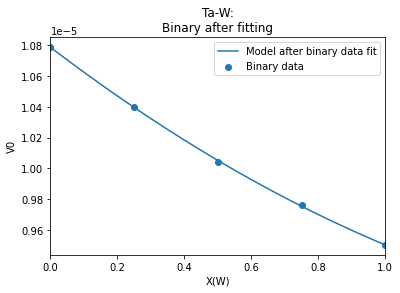

In [17]:
# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "W"], "BCC_A2")

x_TA = np.linspace(0, 1, 1001)
x_W = 1-x_TA
x_TA_W = np.empty((x_TA.shape[-1], 2))
x_TA_W[:, 0] = x_TA
x_TA_W[:, 1] = x_W
func_V0_TA_W = lambdify([v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
print("mix", data_5pt_V0_mix)
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

plt.title("Ta-W:\nBinary after fitting")
plt.plot(x_W, func_V0_TA_W(x_TA_W), label="Model after binary data fit")
plt.scatter(data_5pt_x_W, data_5pt_V0_fix, label='Binary data')
plt.legend()
plt.xlabel("X(W)")
plt.ylabel("V0")
plt.xlim(0, 1)

# Ternary

start with binary fitting

In [18]:
datasets = [
    {
        "components": ["TA", "W"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": 298.15},
        "output": "V0_MIX",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["TA", "W"]], [["TA", "W"]], [["TA", "W"]]], "sublattice_occupancies": [[[0.75, 0.25]], [[0.5, 0.5]], [[0.25, 0.75]]]},
        "values": [[[-6.58257874e-08, -1.00257453e-07, -6.37684692e-08]]],
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

fit_parameters(dbf, ["TA", "W"], "BCC_A2", (("TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)
print(dbf.symbols)

{'VV0000': Piecewise((0.0, And(1.0 <= T, T < 10000.0)), (0, True)), 'VV0001': -3.71677e-07}


mix [ 0.00000000e+00 -6.58257874e-08 -1.00257453e-07 -6.37684692e-08
  0.00000000e+00]
[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]


(0.0, 1.0)

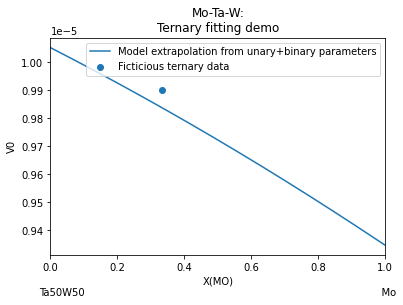

In [19]:
# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "MO", "W"], "BCC_A2")

x_MO = np.linspace(0, 1, 1001)
x_TA = (1 - x_MO) / 2
x_W = (1 - x_MO) / 2
x_MO_TA_W = np.empty((x_MO.shape[-1], 3))
x_MO_TA_W[:, 0] = x_MO
x_MO_TA_W[:, 1] = x_TA
x_MO_TA_W[:, 2] = x_W
func_V0_MO_TA_W = lambdify([v.Y("BCC_A2", 0, "MO"), v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
print("mix", data_5pt_V0_mix)
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

plt.title("Mo-Ta-W:\nTernary fitting demo")
plt.plot(x_MO, func_V0_MO_TA_W(x_MO_TA_W), label="Model extrapolation from unary+binary parameters")
plt.scatter(0.333, 0.99e-5, label='Ficticious ternary data')
plt.legend(loc="upper right")
plt.xlabel(f"X(MO)\nTa50W50{'':>95}Mo")
plt.ylabel("V0")
plt.xlim(0, 1)

## Fit

In [24]:
datasets = [
    {
        "components": ["MO", "TA", "W"],
        "phases": ["BCC_A2"],
        "conditions": {"P": 101315, "T": 298.15},
        "output": "V0",
        "solver": {"mode": "manual", "sublattice_site_ratios": [1], "sublattice_configurations": [[["MO", "TA", "W"]]], "sublattice_occupancies": [[[0.333333, 0.333333, 0.333333]]]},
        "values": [[[0.99e-5]]],  # ficitious value
        "reference": "VASP (LLNL)",
        "bibtex": "UNPUBLISHED",
        "comment": "Brandon Bocklund DFT calculations. VASP, PBEsol, PAW 400 eV cutoff, 0.2 KSPACING",
        "tags": ["non-equilibrium-thermochemical", "LLNL-proprietary"]
    }
]
dbf = Database("lu2005-volumes.tdb")

datasets_db = PickleableTinyDB(storage=MemoryStorage)
datasets_db.insert_multiple(datasets)
if not hasattr(dbf, 'varcounter'):
    dbf.varcounter = 0

# TODO: This has a VV0000 with value 0.0, what's up with that?
fit_parameters(dbf, ["MO", "TA", "W"], "BCC_A2", (("MO", "TA", "W",),), None, datasets_db, fitting_descrption=molar_volume_fit_desc)
print(dbf.symbols)

{'VV0000': Piecewise((0.0, And(1.0 <= T, T < 10000.0)), (0, True)), 'VV0001': 5.76358e-07}


mix [ 0.00000000e+00 -6.58257874e-08 -1.00257453e-07 -6.37684692e-08
  0.00000000e+00]
[1.07870000e-05 1.04002492e-05 1.00448925e-05 9.76045653e-06
 9.50330000e-06]


(0.0, 1.0)

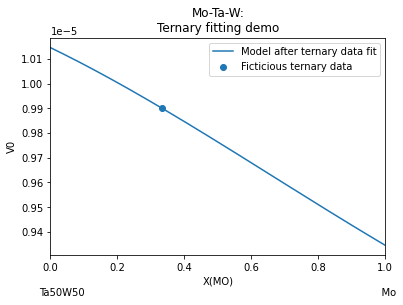

In [25]:
# important, do not reload the database because we just added a new parameter!
mod = Model(dbf, ["TA", "MO", "W"], "BCC_A2")

x_MO = np.linspace(0, 1, 1001)
x_TA = (1 - x_MO) / 2
x_W = (1 - x_MO) / 2
x_MO_TA_W = np.empty((x_MO.shape[-1], 3))
x_MO_TA_W[:, 0] = x_MO
x_MO_TA_W[:, 1] = x_TA
x_MO_TA_W[:, 2] = x_W
func_V0_MO_TA_W = lambdify([v.Y("BCC_A2", 0, "MO"), v.Y("BCC_A2", 0, "TA"), v.Y("BCC_A2", 0, "W")], [mod.symbol_replace(mod.V0, mod._symbols)])

v0_calphad = {  # these were extracted "by hand" from the print output above
    "CR": 7.0403e-06,
    "FE": 7.0079e-06,
    "MO": 9.3461e-06,
    "NB": 1.0752e-05,
    "TA": 1.0787e-05,
    "TI": 1.0592e-05,
    "V": 8.2481e-06,
    "W": 9.5033e-06,
    "ZR": 1.3812e-05,
}

# raw V0s from DFT
data_5pt_x_W = np.asarray([0, 0.25, 0.50, 0.75, 1.0])
data_5pt_V0 = np.asarray([1.0648e-05, 1.0287174212562773e-05, 9.957742546823015e-06, 9.699231530816361e-06, 9.468e-06])

# fix the reference state to match calphad
#                     V0             DFT V0_Ta * x_TA              +      DFT V0_W * x_W
# mixing reference state
data_5pt_V0_mix = data_5pt_V0 - (data_5pt_V0[0]*(1-data_5pt_x_W) + data_5pt_V0[-1]*(data_5pt_x_W))
print("mix", data_5pt_V0_mix)
# absolute values of Calphad unary + DFT_MIX binary
#                Calphad V0_Ta * x_TA               +       Calphad V0_W * x_W       +  DFT V0 MIX
data_5pt_V0_fix = v0_calphad["TA"]*(1-data_5pt_x_W) + v0_calphad["W"]*(data_5pt_x_W) + data_5pt_V0_mix
print(data_5pt_V0_fix)

plt.title("Mo-Ta-W:\nTernary fitting demo")
plt.plot(x_MO, func_V0_MO_TA_W(x_MO_TA_W), label="Model after ternary data fit")
plt.scatter(0.333, 0.99e-5, label='Ficticious ternary data')
plt.legend(loc="upper right")
plt.xlabel(f"X(MO)\nTa50W50{'':>95}Mo")
plt.ylabel("V0")
plt.xlim(0, 1)